
# Implementação em Python - Algoritmo k-means


O algoritmo k-means é uma técnica popular de análise de cluster que agrupa dados não rotulados em clusters distintos. Ele é amplamente utilizado em diversas áreas, como análise de mercado, reconhecimento de padrões, e segmentação de clientes. A ideia central por trás do k-means é encontrar k centroides que representem os centros de cada cluster, minimizando a soma dos quadrados das distâncias entre os pontos de dados e os centroides.

Embora o k-means seja eficaz e fácil de implementar, é importante destacar que ele pode ser sensível à inicialização dos centroides e à presença de outliers nos dados. Além disso, a determinação do número ideal de clusters k pode ser um desafio e requer técnicas como o método do cotovelo ou validação interna.

In [ ]:
!pip install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
base = pd.read_csv("base_viajantes.csv", delimiter=';')

In [ ]:
base

,distancia_anual,numero_viagens
0,300,1
1,350,1
2,450,1
3,300,1
4,360,1
5,480,1
6,800,4
7,600,2
8,750,3
9,900,4


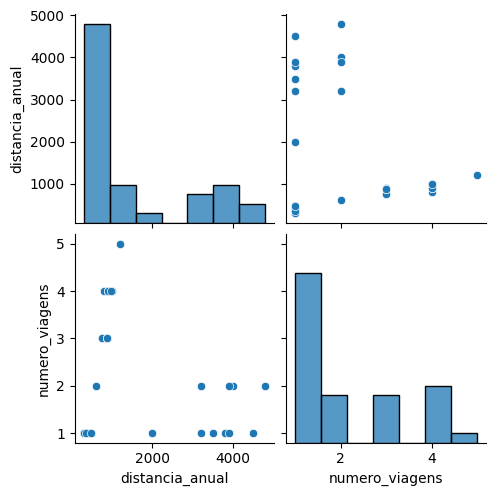

In [ ]:
sns.pairplot(base)

In [ ]:
fig = px.scatter(base, x='distancia_anual', y='numero_viagens',
                 title='Gráfico de Dispersão: Distância Anual vs. Número de Viagens',
                 labels={'distancia_anual': 'Distância Anual', 'numero_viagens': 'Número de Viagens'})

fig.show()

Iremos criar os grupos baseados nos numeros de viagens anuais e distância em km.
Vejam que apenas batendo o olho no gráfico ainda não fica tão claro como estão dividios os grupos.

Para rodar o algoritmo k-means de maneira eficaz, é recomendável padronizar seus dados, especialmente se as variáveis têm escalas diferentes. A padronização (ou normalização) garante que todas as variáveis tenham a mesma escala, evitando que variáveis com magnitudes maiores dominem o processo de clustering.

In [ ]:
base_padronizado = base.copy()

In [ ]:
colunas_padronizar = ['distancia_anual', 'numero_viagens']
# Inicializar o StandardScaler
scaler = StandardScaler()
# Ajustar e transformar os dados selecionados
base_padronizado[colunas_padronizar] = scaler.fit_transform(base[colunas_padronizar])

In [ ]:
base_padronizado

,distancia_anual,numero_viagens
0,-0.834483,-0.836599
1,-0.799959,-0.836599
2,-0.730912,-0.836599
3,-0.834483,-0.836599
4,-0.793055,-0.836599
5,-0.710198,-0.836599
6,-0.489248,1.537533
7,-0.627342,-0.045222
8,-0.523771,0.746156
9,-0.420201,1.537533


**Hora de aplicarmos o algoritmo do k means**

In [ ]:
kmeans_perfil_viajante = KMeans (n_clusters=2, n_init=10, random_state=42)
kmeans_perfil_viajante.fit(base_padronizado)

KMeans(n_clusters=2, n_init=10, random_state=42)

n_clusters=3: Este parâmetro define o número de clusters que você deseja identificar nos seus dados. No exemplo dado, n_clusters=3 significa que você está pedindo ao algoritmo k-means para agrupar seus dados em três clusters distintos.

n_init=10: Este parâmetro define o número de vezes que o algoritmo k-means será executado com diferentes centroides iniciais.

random_state=42: Este parâmetro é usado para controlar a aleatoriedade na inicialização dos centroides. Definir um random_state garante que os resultados sejam reproduzíveis entre diferentes execuções do código.

In [ ]:
centroides = kmeans_perfil_viajante.cluster_centers_
centroides

array([[ 1.49930722, -0.52004798],
       [-0.59972289,  0.20801919]])

In [ ]:
centroides_padronizados = kmeans_perfil_viajante.cluster_centers_  # Centroides padronizados retornados pelo k-means

# Inverter a padronização para obter os centroides originais
centroides_originais = scaler.inverse_transform(centroides_padronizados)
centroides_originais

array([[3.68e+03, 1.40e+00],
       [6.40e+02, 2.32e+00]])

O primeiro centroide [3680, 1.40] sugere que, no cluster representado por esse centroide, os dados têm uma média de aproximadamente 3680 unidades para a variável distancia_anual e uma média de cerca de 1.40 para a variável numero_viagens.

O segundo centroide [640, 2.32] indica que no cluster associado a este centroide, os dados têm uma média de cerca de 640 unidades para distancia_anual e uma média de aproximadamente 2.32 para numero_viagens.

Agora criando os labels dos grupos:

In [ ]:
labels = kmeans_perfil_viajante.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# Criando um df com os dados originais e  rótulos de cluster
df_clusters = pd.DataFrame({
    'distancia_anual': base['distancia_anual'],
    'numero_viagens': base['numero_viagens'],
    'cluster': labels.astype(str)
})

# Plotar os pontos de dados coloridos
fig = px.scatter(df_clusters, x='distancia_anual', y='numero_viagens', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Perfil de Viajantes')

# Adicionar os centroides ao gráfico
fig.add_scatter(x=centroides_originais[:, 0], y=centroides_originais[:, 1],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Distância Anual', yaxis_title='Número de Viagens',
                  legend_title='Cluster')
fig.show()

Vemos que o centroide 1 do clusterr 1 parece estar bem distantes dos pontos daqueles que viajam mais que 3 vezes. Vamos tentar rodar o modelo novamente definindo 3 clusters.

In [ ]:
kmeans_perfil_viajante_3 = KMeans (n_clusters=3, n_init=10, random_state=42)
kmeans_perfil_viajante_3.fit(base_padronizado)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
centroides_padronizado_3 = kmeans_perfil_viajante_3.cluster_centers_
centroides_originais_3  = scaler.inverse_transform(centroides_padronizado_3)
centroides_originais_3

array([[3.86666667e+03, 1.44444444e+00],
       [5.05714286e+02, 1.07142857e+00],
       [9.10000000e+02, 3.66666667e+00]])

In [ ]:
labels_3 = kmeans_perfil_viajante_3.labels_
labels_3

array([1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
df_clusters = pd.DataFrame({
    'distancia_anual': base['distancia_anual'],
    'numero_viagens': base['numero_viagens'],
    'cluster': labels_3.astype(str)
})

fig = px.scatter(df_clusters, x='distancia_anual', y='numero_viagens', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Perfil de Viajantes')

fig.add_scatter(x=centroides_originais_3[:, 0], y=centroides_originais_3[:, 1],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Distância Anual', yaxis_title='Número de Viagens',
                  legend_title='Cluster')
fig.show()

In [ ]:
base['cluster'] = labels_3

In [ ]:
medias_por_cluster = base.groupby('cluster')[['distancia_anual', 'numero_viagens']].mean()

In [ ]:
medias_por_cluster


,distancia_anual,numero_viagens
cluster,,
0,3866.666667,1.444444
1,505.714286,1.071429
2,910.000000,3.666667


Conseguimos identificar 3 grupos de segmentação de clientes:

0 - Viaja uma distância média de 3866 km por ano e em torno de 1 a 2 viagens. = Viagens mais longas, menos vezes por ano. Podemos inferir que viagens mais caras, viagens internacionais.

2 - Viaja uma distância média de 505 km e em torno 1 viagem por ano.
= Viagens mais curtas, nacionais, viagem anual, mais baratas.

3 - 910 km e em torno de 3 a 4 viagens, são viagens curtas e várias vezes no ano. Podemos inferir que esse grupo viaja a trabalho.

Através dessa análise poderiamos dar informações valiosas para o time de marketing por exemplo. Oferecer as viagens mais longas via email para os clientes do grupo 0, e verificar se eles já viajaram no ano, se já viajaram 2x é provavel que não viagem mais. Para os clientes no grupo 2 poderiamos enviar viagens promocionais nacionais.
Já os clientes do grupo 2 valeria entender os destinos que viajam a trabalho e a recorrencia e enviar emails de lembretes com ofertas.